# LOAN APPROVAL PREDICTION 

## Objective

To build a machine learning model that can predict whether a loan will be approved or not, using
various applicant and loan-related features. The goal is to help financial institutions make data-driven
lending decisions.

#### Financial institutions often face significant challenges in automating loan approval processes due to:

Poor data quality

Human entry errors

Unstructured fields

Biased or imbalanced data

Lack of explainability in automated decisions

This project simulates a realistic environment by working on intentionally messy synthetic data, requiring deep preprocessing and feature engineering before model training.

## About Dataset

The sample dataset includes various details, such as:

#### Categorical Columns: 
Gender (Male, Female) | 
Married (Yes, No) | 
Education (Graduate, Not Graduate) | 
Self_Employed (Yes, No) | 
Property_Area (Urban, Semiurban, Rural) | 
Loan_Status (Y, N) — also called the target variable

#### Numerical Columns:
ApplicantIncome (e.g., 50000) | 
LoanAmount (e.g., 200000) | 
Loan_Amount_Term (e.g., 360 months) | 
Credit_Score (e.g., 720) | 
Age (e.g., 32)


## Importing necessary libraries

In [1]:
import sys
print(sys.executable)

C:\Users\admin\.conda\envs\loanenv\python.exe


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

## Importing Dataset

In [3]:
loan_data = pd.read_csv("loan_data_2.csv")
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP00000,Male,Yes,0,Graduate,No,5180,2443,120,NaN,0.0,Rural,Y
1,LP00001,Female,Yes,1,Graduate,No,1186,2588,153,360.0,1.0,Rural,N
2,LP00002,Female,Yes,0,Graduate,Yes,4580,1381,86,120.0,1.0,Urban,Y
3,LP00003,Female,Yes,1,Graduate,No,8842,2471,143,360.0,1.0,Rural,Y
4,LP00004,Male,Yes,0,Not Graduate,No,1730,3219,172,360.0,1.0,Urban,N


## Descriptive statistics

In [4]:
loan_data.shape

(100000, 13)

Total no. of rows = 100000,
Total no. of columns = 13

In [5]:
#summary of dataset
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Loan_ID            100000 non-null  object 
 1   Gender             96114 non-null   object 
 2   Married            94944 non-null   object 
 3   Dependents         94899 non-null   object 
 4   Education          100000 non-null  object 
 5   Self_Employed      95016 non-null   object 
 6   ApplicantIncome    100000 non-null  int64  
 7   CoapplicantIncome  100000 non-null  int64  
 8   LoanAmount         100000 non-null  int64  
 9   Loan_Amount_Term   95005 non-null   float64
 10  Credit_History     94819 non-null   float64
 11  Property_Area      100000 non-null  object 
 12  Loan_Status        100000 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 9.9+ MB


In [6]:
#Descriptive summary of dataset
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,100000.000000,100000.00000,100000.000000,95005.000000,94819.000000
mean,4882.531270,1955.52744,151.495140,309.512973,0.842004
std,2242.786591,1079.28753,95.673015,87.652810,0.364739
min,-11213.000000,-4828.00000,-65.000000,120.000000,0.000000
25%,3580.000000,1295.00000,116.000000,240.000000,1.000000
50%,4959.000000,1985.00000,150.000000,360.000000,1.000000
75%,6328.000000,2663.00000,184.000000,360.000000,1.000000
max,13603.000000,6678.00000,3800.000000,360.000000,1.000000


In [7]:
loan_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
#checking for null values
loan_data.isnull().sum()

Loan_ID                 0
Gender               3886
Married              5056
Dependents           5101
Education               0
Self_Employed        4984
ApplicantIncome         0
CoapplicantIncome       0
LoanAmount              0
Loan_Amount_Term     4995
Credit_History       5181
Property_Area           0
Loan_Status             0
dtype: int64

In [9]:
loan_data_cleaned = loan_data.copy(deep = True)

In [10]:
#loan_data_cleaned = loan_data_cleaned.sample(n=50000, random_state=42).reset_index(drop=True)

# Univariate Analysis 

<Axes: xlabel='Gender', ylabel='Count'>

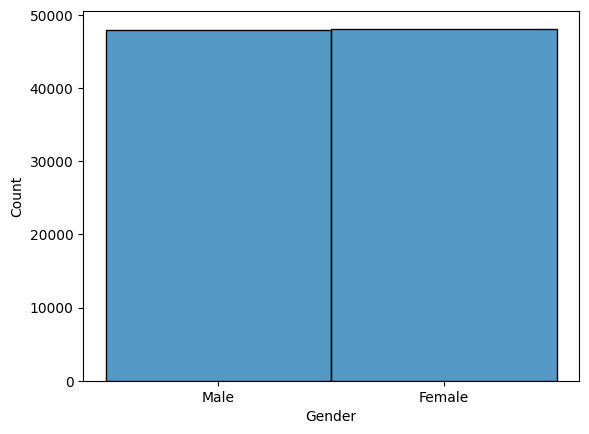

In [11]:
sns.histplot(loan_data_cleaned['Gender'])

Count of Male applicants is similar to Female

<Axes: xlabel='Loan_Status', ylabel='Count'>

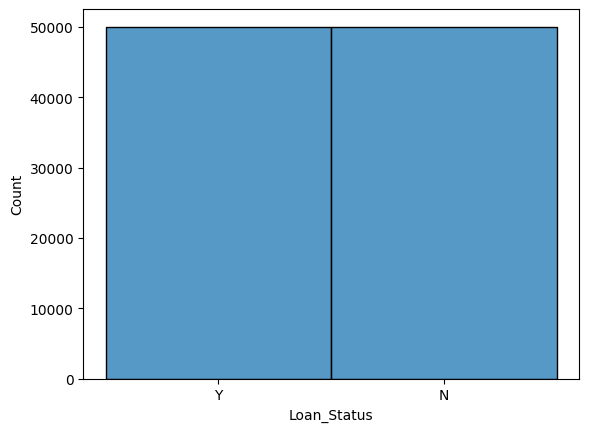

In [12]:
sns.histplot(loan_data_cleaned['Loan_Status'])

<Axes: xlabel='Married', ylabel='Count'>

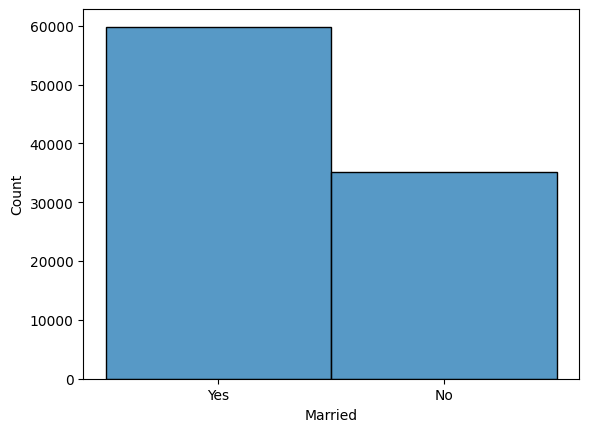

In [13]:
sns.histplot(loan_data_cleaned['Married'])

Count of Married applicant is more than Non-married

<Axes: xlabel='Education', ylabel='Count'>

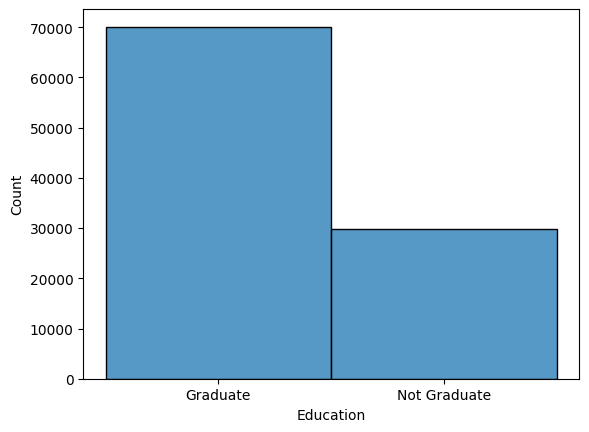

In [14]:
sns.histplot(loan_data_cleaned['Education'])

Count of graduate is more than non-Graduate

<Axes: xlabel='Self_Employed', ylabel='Count'>

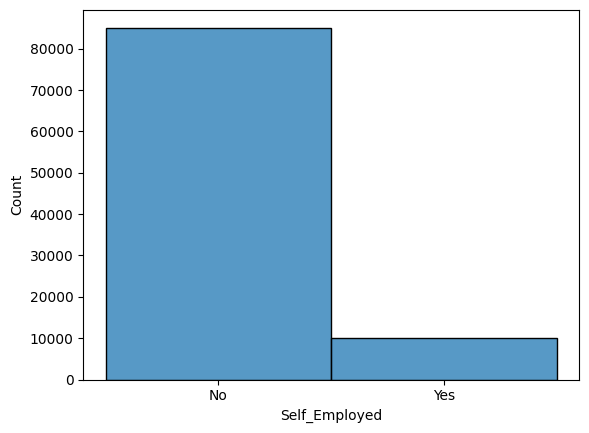

In [15]:
sns.histplot(loan_data_cleaned['Self_Employed'])

Count of Self employed is less than non-self employed

<Axes: xlabel='Property_Area', ylabel='Count'>

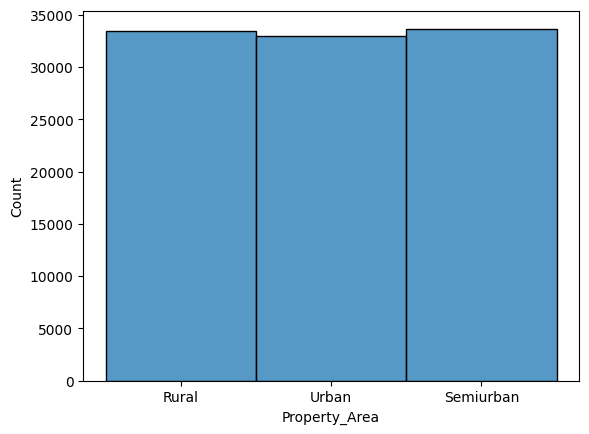

In [16]:
sns.histplot(loan_data_cleaned['Property_Area'])

<Axes: xlabel='Credit_History', ylabel='Count'>

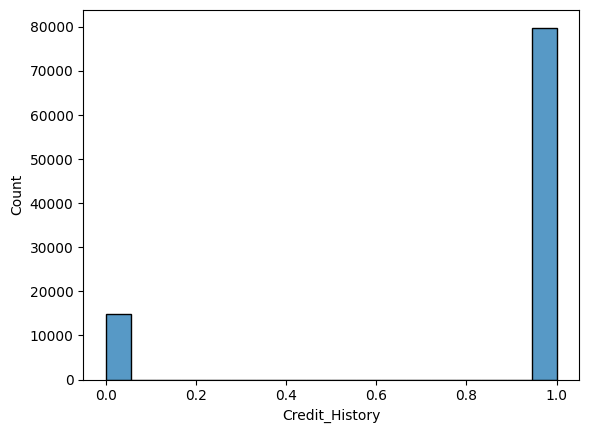

In [17]:
sns.histplot(loan_data_cleaned['Credit_History'])

Credit History is present for many applicants

<Axes: xlabel='Dependents', ylabel='Count'>

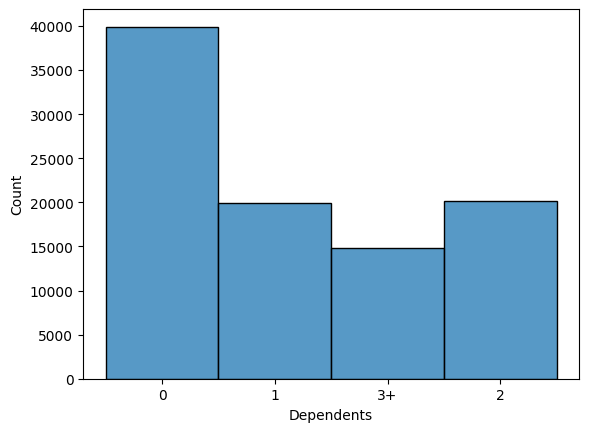

In [18]:
sns.histplot(loan_data_cleaned['Dependents'])

The count of applicants with several dependents=0 is maximum

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

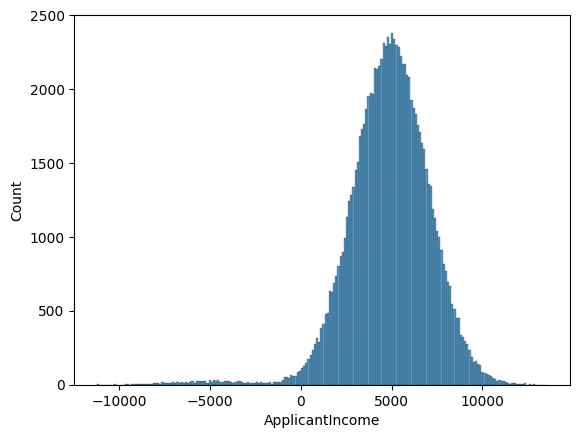

In [19]:
sns.histplot(loan_data_cleaned['ApplicantIncome'])

In [20]:
loan_data_cleaned['ApplicantIncome'].mean()

np.float64(4882.53127)

# Converting type

In [21]:
loan_data_cleaned['Dependents'].unique()

array(['0', '1', '3+', '2', nan], dtype=object)

In [22]:
# Convert types if needed (e.g., object to string)
loan_data_cleaned['Dependents'].replace('3+', 3, inplace=True)
loan_data_cleaned['Dependents'] = loan_data_cleaned['Dependents'].astype(float)

# Fixing negative income

In [23]:
loan_data_cleaned[loan_data_cleaned['ApplicantIncome'] < 0]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
52,LP00052,Female,Yes,3.0,Graduate,No,-6344,2771,169,360.0,1.0,Urban,N
53,LP00053,Female,No,0.0,Not Graduate,No,-113,2250,167,120.0,0.0,Urban,N
78,LP00078,Male,Yes,0.0,Not Graduate,No,-246,2413,243,360.0,1.0,Semiurban,N
275,LP00275,Female,Yes,1.0,Not Graduate,NaN,-4985,2621,164,360.0,1.0,Urban,N
433,LP00433,Male,No,0.0,Graduate,No,-336,2139,104,360.0,1.0,Semiurban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99835,LP99835,Female,Yes,2.0,Graduate,No,-6533,1500,175,360.0,1.0,Semiurban,N
99869,LP99869,Male,Yes,2.0,Graduate,No,-7325,-2000,80,360.0,1.0,Rural,Y
99898,LP99898,Female,No,0.0,Not Graduate,No,-3894,881,105,360.0,1.0,Urban,Y
99933,LP99933,Female,Yes,2.0,Not Graduate,No,-281,1256,126,120.0,1.0,Semiurban,N


In [24]:
loan_data_cleaned[loan_data_cleaned['CoapplicantIncome'] < 0]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
62,LP00062,Female,Yes,0.0,Not Graduate,No,6520,-2323,147,360.0,1.0,Urban,Y
83,LP00083,Male,Yes,2.0,Graduate,No,4484,-637,95,360.0,NaN,Urban,Y
113,LP00113,Female,No,0.0,Graduate,No,4016,-2159,230,120.0,1.0,Urban,N
157,LP00157,Female,No,0.0,Graduate,No,2941,-997,169,360.0,1.0,Rural,N
223,LP00223,Male,Yes,3.0,Not Graduate,NaN,5428,-3384,114,360.0,1.0,Semiurban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99742,LP99742,Female,Yes,3.0,Graduate,No,1394,-1791,153,360.0,1.0,Rural,N
99774,LP99774,Male,Yes,0.0,Graduate,No,2707,-26,62,360.0,1.0,Rural,Y
99869,LP99869,Male,Yes,2.0,Graduate,No,-7325,-2000,80,360.0,1.0,Rural,Y
99927,LP99927,Female,Yes,1.0,Not Graduate,No,3532,-770,156,360.0,1.0,Urban,N


In [25]:
# Fix negative incomes
loan_data_cleaned['ApplicantIncome'] = loan_data_cleaned['ApplicantIncome'].apply(lambda x: np.nan if x < 0 else x)
loan_data_cleaned['CoapplicantIncome'] = loan_data_cleaned['CoapplicantIncome'].apply(lambda x: np.nan if x < 0 else x)

# Dealing with null values

In [26]:
loan_data_cleaned.isnull().sum()

Loan_ID                 0
Gender               3886
Married              5056
Dependents           5101
Education               0
Self_Employed        4984
ApplicantIncome      1631
CoapplicantIncome    3262
LoanAmount              0
Loan_Amount_Term     4995
Credit_History       5181
Property_Area           0
Loan_Status             0
dtype: int64

In [27]:
#GENDER
value_to_fill = loan_data_cleaned['Gender'].mode()[0]
loan_data_cleaned['Gender'].fillna(value_to_fill,inplace=True)
loan_data_cleaned.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP00000,Male,Yes,0.0,Graduate,No,5180.0,2443.0,120,NaN,0.0,Rural,Y
1,LP00001,Female,Yes,1.0,Graduate,No,1186.0,2588.0,153,360.0,1.0,Rural,N
2,LP00002,Female,Yes,0.0,Graduate,Yes,4580.0,1381.0,86,120.0,1.0,Urban,Y
3,LP00003,Female,Yes,1.0,Graduate,No,8842.0,2471.0,143,360.0,1.0,Rural,Y
4,LP00004,Male,Yes,0.0,Not Graduate,No,1730.0,3219.0,172,360.0,1.0,Urban,N


In [28]:
#GENDER
value_to_fill = loan_data_cleaned['Married'].mode()[0]
loan_data_cleaned['Married'].fillna(value_to_fill,inplace=True)
loan_data_cleaned.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP00000,Male,Yes,0.0,Graduate,No,5180.0,2443.0,120,NaN,0.0,Rural,Y
1,LP00001,Female,Yes,1.0,Graduate,No,1186.0,2588.0,153,360.0,1.0,Rural,N
2,LP00002,Female,Yes,0.0,Graduate,Yes,4580.0,1381.0,86,120.0,1.0,Urban,Y
3,LP00003,Female,Yes,1.0,Graduate,No,8842.0,2471.0,143,360.0,1.0,Rural,Y
4,LP00004,Male,Yes,0.0,Not Graduate,No,1730.0,3219.0,172,360.0,1.0,Urban,N


In [29]:
#DEPENDENTS
value_to_fill = loan_data_cleaned['Dependents'].mode()[0]
loan_data_cleaned['Dependents'].fillna(value_to_fill,inplace=True)
loan_data_cleaned.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP00000,Male,Yes,0.0,Graduate,No,5180.0,2443.0,120,NaN,0.0,Rural,Y
1,LP00001,Female,Yes,1.0,Graduate,No,1186.0,2588.0,153,360.0,1.0,Rural,N
2,LP00002,Female,Yes,0.0,Graduate,Yes,4580.0,1381.0,86,120.0,1.0,Urban,Y
3,LP00003,Female,Yes,1.0,Graduate,No,8842.0,2471.0,143,360.0,1.0,Rural,Y
4,LP00004,Male,Yes,0.0,Not Graduate,No,1730.0,3219.0,172,360.0,1.0,Urban,N


In [30]:
#SELF EMPLOYED
value_to_fill = loan_data_cleaned['Self_Employed'].mode()[0]
loan_data_cleaned['Self_Employed'].fillna(value_to_fill,inplace=True)
loan_data_cleaned.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP00000,Male,Yes,0.0,Graduate,No,5180.0,2443.0,120,NaN,0.0,Rural,Y
1,LP00001,Female,Yes,1.0,Graduate,No,1186.0,2588.0,153,360.0,1.0,Rural,N
2,LP00002,Female,Yes,0.0,Graduate,Yes,4580.0,1381.0,86,120.0,1.0,Urban,Y
3,LP00003,Female,Yes,1.0,Graduate,No,8842.0,2471.0,143,360.0,1.0,Rural,Y
4,LP00004,Male,Yes,0.0,Not Graduate,No,1730.0,3219.0,172,360.0,1.0,Urban,N


In [31]:
loan_data_cleaned['Loan_Amount_Term'].unique()

array([ nan, 360., 120., 240., 180.])

In [32]:
# Its only proper to fill null values of loan amount term with mode
value_to_fill = loan_data_cleaned['Loan_Amount_Term'].mode()[0]
loan_data_cleaned['Loan_Amount_Term'].fillna(value_to_fill,inplace=True)
loan_data_cleaned.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP00000,Male,Yes,0.0,Graduate,No,5180.0,2443.0,120,360.0,0.0,Rural,Y
1,LP00001,Female,Yes,1.0,Graduate,No,1186.0,2588.0,153,360.0,1.0,Rural,N
2,LP00002,Female,Yes,0.0,Graduate,Yes,4580.0,1381.0,86,120.0,1.0,Urban,Y
3,LP00003,Female,Yes,1.0,Graduate,No,8842.0,2471.0,143,360.0,1.0,Rural,Y
4,LP00004,Male,Yes,0.0,Not Graduate,No,1730.0,3219.0,172,360.0,1.0,Urban,N


In [33]:
#CREDIT HISTORY
value_to_fill = loan_data_cleaned['Credit_History'].mode()[0]
loan_data_cleaned['Credit_History'].fillna(value_to_fill,inplace=True)
loan_data_cleaned.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP00000,Male,Yes,0.0,Graduate,No,5180.0,2443.0,120,360.0,0.0,Rural,Y
1,LP00001,Female,Yes,1.0,Graduate,No,1186.0,2588.0,153,360.0,1.0,Rural,N
2,LP00002,Female,Yes,0.0,Graduate,Yes,4580.0,1381.0,86,120.0,1.0,Urban,Y
3,LP00003,Female,Yes,1.0,Graduate,No,8842.0,2471.0,143,360.0,1.0,Rural,Y
4,LP00004,Male,Yes,0.0,Not Graduate,No,1730.0,3219.0,172,360.0,1.0,Urban,N


In [34]:
loan_data_cleaned['LoanAmount'].median()

np.float64(150.0)

In [35]:
loan_data_cleaned['LoanAmount'].mean()

np.float64(151.49514)

### Since loan amount gave us similar result we will fill null values with median

In [36]:
#LOAN AMOUNT
value_to_fill = loan_data_cleaned['LoanAmount'].mean()
loan_data_cleaned['LoanAmount'].fillna(value_to_fill,inplace=True)
loan_data_cleaned.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP00000,Male,Yes,0.0,Graduate,No,5180.0,2443.0,120,360.0,0.0,Rural,Y
1,LP00001,Female,Yes,1.0,Graduate,No,1186.0,2588.0,153,360.0,1.0,Rural,N
2,LP00002,Female,Yes,0.0,Graduate,Yes,4580.0,1381.0,86,120.0,1.0,Urban,Y
3,LP00003,Female,Yes,1.0,Graduate,No,8842.0,2471.0,143,360.0,1.0,Rural,Y
4,LP00004,Male,Yes,0.0,Not Graduate,No,1730.0,3219.0,172,360.0,1.0,Urban,N


<Axes: xlabel='ApplicantIncome', ylabel='Count'>

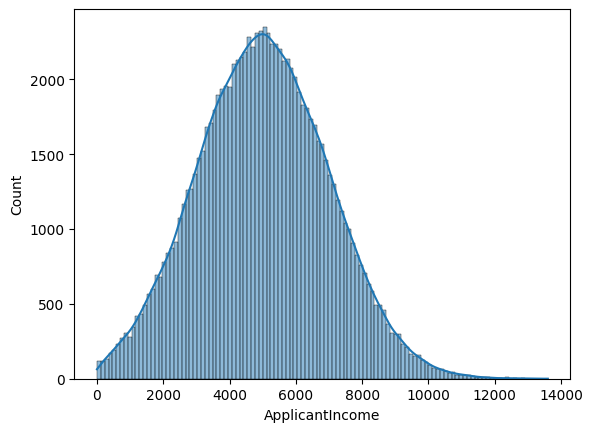

In [37]:
sns.histplot(loan_data_cleaned['ApplicantIncome'], kde=True)

In [38]:
loan_data_cleaned['ApplicantIncome'].skew()

np.float64(0.10378587601279603)

Skewness > 1 or < -1 → highly skewed → use median.

Skewness between -0.5 and 0.5 → fairly symmetric → mean is okay.

<Axes: xlabel='CoapplicantIncome', ylabel='Count'>

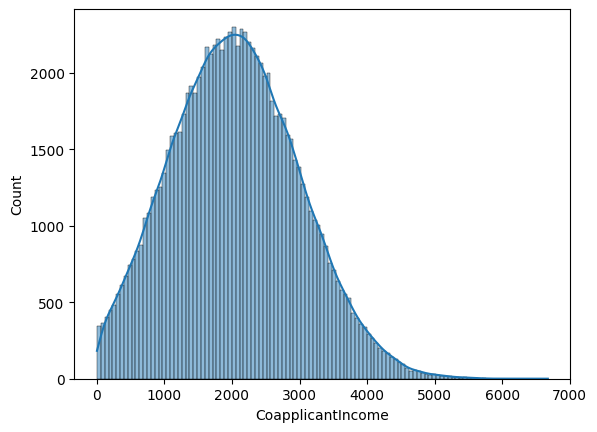

In [39]:
sns.histplot(loan_data_cleaned['CoapplicantIncome'], kde=True)

In [40]:
loan_data_cleaned['CoapplicantIncome'].skew()

np.float64(0.22891456561988527)

In [41]:
value_to_fill = loan_data_cleaned['ApplicantIncome'].mean()
loan_data_cleaned['ApplicantIncome'].fillna(value_to_fill,inplace=True)


In [42]:
value_to_fill = loan_data_cleaned['CoapplicantIncome'].mean()
loan_data_cleaned['CoapplicantIncome'].fillna(value_to_fill,inplace=True)


In [43]:
loan_data_cleaned.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [44]:
loan_data_cleaned.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount             int64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [45]:
loan_data_cleaned['Dependents'] = loan_data_cleaned['Dependents'].astype(str)
loan_data_cleaned['Dependents'] = loan_data_cleaned['Dependents'].replace({'3.0': '3+'})

In [46]:
loan_data_cleaned['Dependents'].unique()

array(['0.0', '1.0', '3+', '2.0'], dtype=object)

In [47]:
loan_data_cleaned.replace([np.inf, -np.inf], np.nan, inplace=True)

In [48]:
cat_cols = loan_data_cleaned.select_dtypes(include='object').columns
num_cols = loan_data_cleaned.select_dtypes(include=['int64', 'float64']).columns

In [49]:
for col in num_cols:
    loan_data_cleaned[col].fillna(loan_data_cleaned[col].mean(), inplace=True)

In [50]:
for col in cat_cols:
    loan_data_cleaned[col].fillna(loan_data_cleaned[col].mode()[0], inplace=True)

# Outliers

## Applicant Income

### Relation between Applicant Income and Loan status

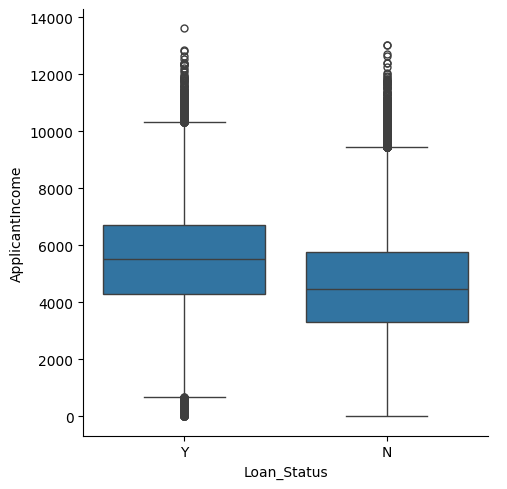

In [51]:
sns.catplot(data=loan_data_cleaned, y='ApplicantIncome', x='Loan_Status', kind ='box')

In [52]:
q1, q3 = np.percentile(loan_data_cleaned['ApplicantIncome'], [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
print(lower_bound)
print(upper_bound)
outliers = loan_data_cleaned[(loan_data_cleaned['ApplicantIncome'] < lower_bound) | (loan_data_cleaned['ApplicantIncome'] > upper_bound)]
outliers

-287.0
10297.0


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
75,LP00075,Female,Yes,2.0,Not Graduate,No,10886.0,1690.0,120,360.0,1.0,Semiurban,N
380,LP00380,Male,Yes,1.0,Graduate,No,11370.0,2027.0,239,360.0,1.0,Rural,N
998,LP00998,Female,No,0.0,Graduate,No,10413.0,1374.0,132,120.0,0.0,Rural,Y
1042,LP01042,Male,Yes,3+,Graduate,Yes,10553.0,2536.0,182,240.0,0.0,Urban,N
1613,LP01613,Male,No,3+,Graduate,Yes,10412.0,2760.0,148,360.0,0.0,Semiurban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98822,LP98822,Female,Yes,0.0,Graduate,No,11110.0,2682.0,162,360.0,1.0,Rural,N
99280,LP99280,Female,No,3+,Graduate,No,10608.0,2783.0,181,360.0,1.0,Urban,N
99502,LP99502,Female,Yes,1.0,Graduate,No,10517.0,1816.0,150,240.0,1.0,Rural,Y
99744,LP99744,Male,No,1.0,Graduate,Yes,11186.0,929.0,131,180.0,1.0,Semiurban,Y


## Removing outliers

In [53]:
#taking 15000 as threshold
index_drop=loan_data_cleaned[loan_data_cleaned['ApplicantIncome'] > 15000].index
loan_data_cleaned=loan_data_cleaned.drop(index_drop).reset_index(drop=True)
loan_data_cleaned

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP00000,Male,Yes,0.0,Graduate,No,5180.0,2443.0,120,360.0,0.0,Rural,Y
1,LP00001,Female,Yes,1.0,Graduate,No,1186.0,2588.0,153,360.0,1.0,Rural,N
2,LP00002,Female,Yes,0.0,Graduate,Yes,4580.0,1381.0,86,120.0,1.0,Urban,Y
3,LP00003,Female,Yes,1.0,Graduate,No,8842.0,2471.0,143,360.0,1.0,Rural,Y
4,LP00004,Male,Yes,0.0,Not Graduate,No,1730.0,3219.0,172,360.0,1.0,Urban,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,LP99995,Female,No,0.0,Not Graduate,No,8214.0,39.0,204,360.0,1.0,Rural,N
99996,LP99996,Female,No,2.0,Graduate,No,4918.0,4963.0,68,360.0,1.0,Semiurban,Y
99997,LP99997,Female,Yes,2.0,Graduate,No,2343.0,1273.0,262,360.0,1.0,Urban,N
99998,LP99998,Female,No,0.0,Not Graduate,No,7434.0,616.0,116,120.0,1.0,Rural,Y


## Coapplicant Income

### Relation between Coapplicant Income and Loan status

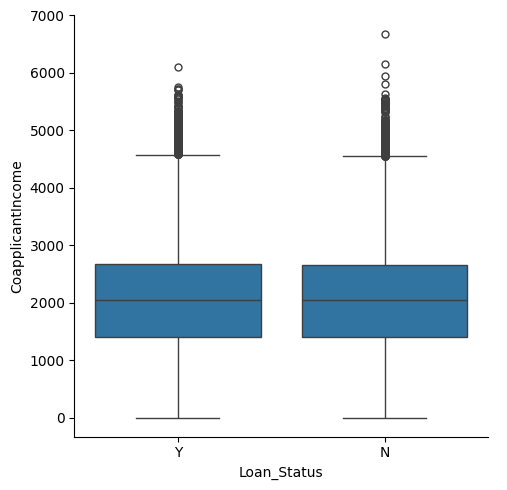

In [54]:
sns.catplot(data=loan_data_cleaned, y='CoapplicantIncome', x='Loan_Status', kind ='box')

In [55]:
q1, q3 = np.percentile(loan_data_cleaned['CoapplicantIncome'], [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
print(lower_bound)
print(upper_bound)
outliers = loan_data_cleaned[(loan_data_cleaned['CoapplicantIncome'] < lower_bound) | (loan_data_cleaned['CoapplicantIncome'] > upper_bound)]
outliers

-504.5
4563.5


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
508,LP00508,Female,Yes,0.0,Not Graduate,No,5822.0,4743.0,148,360.0,1.0,Urban,Y
701,LP00701,Male,Yes,1.0,Graduate,No,6569.0,4629.0,197,360.0,0.0,Urban,Y
860,LP00860,Female,No,1.0,Graduate,No,7169.0,5470.0,131,360.0,1.0,Urban,N
1219,LP01219,Male,Yes,0.0,Graduate,No,7575.0,4985.0,71,120.0,0.0,Semiurban,N
1267,LP01267,Male,Yes,0.0,Not Graduate,No,6125.0,4593.0,123,360.0,0.0,Semiurban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99758,LP99758,Female,Yes,1.0,Graduate,No,6565.0,4611.0,99,360.0,1.0,Rural,N
99847,LP99847,Female,Yes,0.0,Graduate,No,7221.0,5301.0,213,360.0,0.0,Semiurban,Y
99911,LP99911,Male,No,0.0,Graduate,No,5010.0,5177.0,107,360.0,1.0,Semiurban,N
99915,LP99915,Female,Yes,3+,Graduate,Yes,5001.0,4720.0,242,360.0,1.0,Semiurban,N


## Removing outliers

In [56]:
#taking 6,100 as threshold
index_drop=loan_data_cleaned[loan_data_cleaned['CoapplicantIncome'] > 6100].index
loan_data_cleaned=loan_data_cleaned.drop(index_drop).reset_index(drop=True)
loan_data_cleaned

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP00000,Male,Yes,0.0,Graduate,No,5180.0,2443.0,120,360.0,0.0,Rural,Y
1,LP00001,Female,Yes,1.0,Graduate,No,1186.0,2588.0,153,360.0,1.0,Rural,N
2,LP00002,Female,Yes,0.0,Graduate,Yes,4580.0,1381.0,86,120.0,1.0,Urban,Y
3,LP00003,Female,Yes,1.0,Graduate,No,8842.0,2471.0,143,360.0,1.0,Rural,Y
4,LP00004,Male,Yes,0.0,Not Graduate,No,1730.0,3219.0,172,360.0,1.0,Urban,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99992,LP99995,Female,No,0.0,Not Graduate,No,8214.0,39.0,204,360.0,1.0,Rural,N
99993,LP99996,Female,No,2.0,Graduate,No,4918.0,4963.0,68,360.0,1.0,Semiurban,Y
99994,LP99997,Female,Yes,2.0,Graduate,No,2343.0,1273.0,262,360.0,1.0,Urban,N
99995,LP99998,Female,No,0.0,Not Graduate,No,7434.0,616.0,116,120.0,1.0,Rural,Y


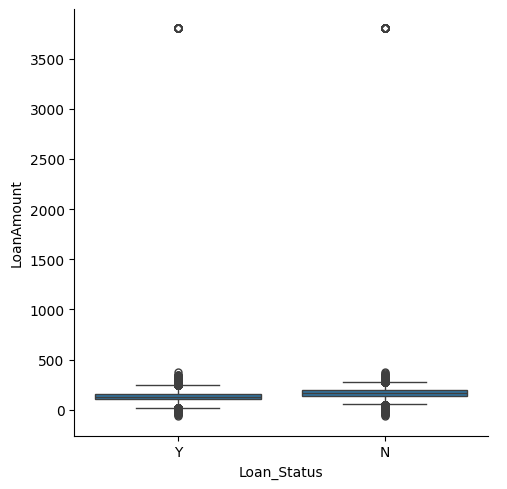

In [57]:
sns.catplot(data=loan_data_cleaned, y='LoanAmount', x='Loan_Status', kind ='box')

In [58]:
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
print(lower_bound)
print(upper_bound)
outliers = loan_data_cleaned[(loan_data_cleaned['LoanAmount'] < lower_bound) | (loan_data_cleaned['LoanAmount'] > upper_bound)]
outliers

-504.5
4563.5


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


<Axes: xlabel='Credit_History', ylabel='Count'>

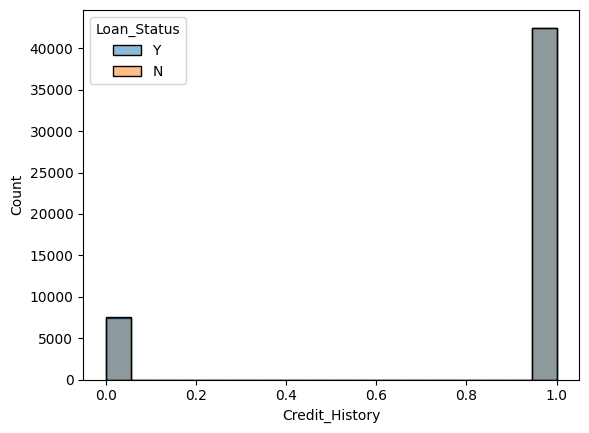

In [59]:
sns.histplot(data=loan_data_cleaned, x="Credit_History", hue="Loan_Status")

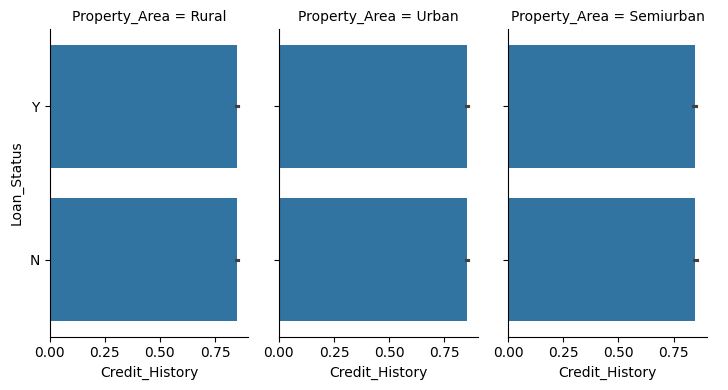

In [60]:
sns.catplot(data=loan_data_cleaned, x="Credit_History", y="Loan_Status", col="Property_Area",kind="bar", height=4, aspect=.6,)

# Data preparation

# Feature Engineering

In [61]:
loan_data_cleaned.drop('Loan_ID',axis=1, inplace=True)

In [62]:
loan_data_cleaned['TotalIncome'] = loan_data_cleaned['ApplicantIncome'] + loan_data_cleaned['CoapplicantIncome']
#loan_data_cleaned['LoanAmount_log'] = np.log1p(loan_data_cleaned['LoanAmount'])
loan_data_cleaned['LoanAmount_log'] = np.log(loan_data_cleaned['LoanAmount'].replace(0, np.nan))
loan_data_cleaned['LoanAmount_log'] = loan_data_cleaned['LoanAmount_log'].fillna(loan_data_cleaned['LoanAmount_log'].mean())
loan_data_cleaned['EMI'] = loan_data_cleaned['LoanAmount'] / loan_data_cleaned['Loan_Amount_Term']
loan_data_cleaned['Balance_Income'] = loan_data_cleaned['TotalIncome'] - (loan_data_cleaned['EMI']*1000)  # assuming EMI in thousands

## Converting categorical columns to numerical

## One hot encoding

In [63]:
loan_data_encoded_ = loan_data_cleaned.copy(deep = True)
loan_data_encoded_.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,LoanAmount_log,EMI,Balance_Income
0,Male,Yes,0.0,Graduate,No,5180.0,2443.0,120,360.0,0.0,Rural,Y,7623.0,4.787492,0.333333,7289.666667
1,Female,Yes,1.0,Graduate,No,1186.0,2588.0,153,360.0,1.0,Rural,N,3774.0,5.030438,0.425000,3349.000000
2,Female,Yes,0.0,Graduate,Yes,4580.0,1381.0,86,120.0,1.0,Urban,Y,5961.0,4.454347,0.716667,5244.333333
3,Female,Yes,1.0,Graduate,No,8842.0,2471.0,143,360.0,1.0,Rural,Y,11313.0,4.962845,0.397222,10915.777778
4,Male,Yes,0.0,Not Graduate,No,1730.0,3219.0,172,360.0,1.0,Urban,N,4949.0,5.147494,0.477778,4471.222222


In [64]:
# Importing onehotencoder
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()

In [65]:
loan_data_encoded_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99997 entries, 0 to 99996
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             99997 non-null  object 
 1   Married            99997 non-null  object 
 2   Dependents         99997 non-null  object 
 3   Education          99997 non-null  object 
 4   Self_Employed      99997 non-null  object 
 5   ApplicantIncome    99997 non-null  float64
 6   CoapplicantIncome  99997 non-null  float64
 7   LoanAmount         99997 non-null  int64  
 8   Loan_Amount_Term   99997 non-null  float64
 9   Credit_History     99997 non-null  float64
 10  Property_Area      99997 non-null  object 
 11  Loan_Status        99997 non-null  object 
 12  TotalIncome        99997 non-null  float64
 13  LoanAmount_log     99997 non-null  float64
 14  EMI                99997 non-null  float64
 15  Balance_Income     99997 non-null  float64
dtypes: float64(8), int64(1

In [66]:
#converting categorical variables to numerical
encoded_loan_data=encoder.fit_transform(loan_data_encoded_[['Gender','Married','Education','Dependents','Self_Employed','Property_Area']]).toarray()
encoded_loan_dataset=pd.DataFrame(encoded_loan_data,columns=encoder.get_feature_names_out())
encoded_loan_dataset

,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Dependents_0.0,Dependents_1.0,Dependents_2.0,Dependents_3+,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99992,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
99993,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
99994,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
99995,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [67]:
#merging dataframes
loan_data_encoded_=pd.concat([encoded_loan_dataset,loan_data_encoded_,],axis=1)
loan_data_encoded_

,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Dependents_0.0,Dependents_1.0,Dependents_2.0,Dependents_3+,...,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,LoanAmount_log,EMI,Balance_Income
0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,2443.0,120,360.0,0.0,Rural,Y,7623.0,4.787492,0.333333,7289.666667
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,2588.0,153,360.0,1.0,Rural,N,3774.0,5.030438,0.425000,3349.000000
2,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1381.0,86,120.0,1.0,Urban,Y,5961.0,4.454347,0.716667,5244.333333
3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,2471.0,143,360.0,1.0,Rural,Y,11313.0,4.962845,0.397222,10915.777778
4,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,3219.0,172,360.0,1.0,Urban,N,4949.0,5.147494,0.477778,4471.222222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99992,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,39.0,204,360.0,1.0,Rural,N,8253.0,5.318120,0.566667,7686.333333
99993,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,4963.0,68,360.0,1.0,Semiurban,Y,9881.0,4.219508,0.188889,9692.111111
99994,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1273.0,262,360.0,1.0,Urban,N,3616.0,5.568345,0.727778,2888.222222
99995,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,616.0,116,120.0,1.0,Rural,Y,8050.0,4.753590,0.966667,7083.333333


In [68]:
loan_data_encoded_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99997 entries, 0 to 99996
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender_Female            99997 non-null  float64
 1   Gender_Male              99997 non-null  float64
 2   Married_No               99997 non-null  float64
 3   Married_Yes              99997 non-null  float64
 4   Education_Graduate       99997 non-null  float64
 5   Education_Not Graduate   99997 non-null  float64
 6   Dependents_0.0           99997 non-null  float64
 7   Dependents_1.0           99997 non-null  float64
 8   Dependents_2.0           99997 non-null  float64
 9   Dependents_3+            99997 non-null  float64
 10  Self_Employed_No         99997 non-null  float64
 11  Self_Employed_Yes        99997 non-null  float64
 12  Property_Area_Rural      99997 non-null  float64
 13  Property_Area_Semiurban  99997 non-null  float64
 14  Property_Area_Urban   

In [69]:
#dropping unnecessary columns
loan_data_encoded_.drop(['Gender','Married','Education','Dependents','Self_Employed','Property_Area'],axis=1,inplace=True)
loan_data_encoded_

,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Dependents_0.0,Dependents_1.0,Dependents_2.0,Dependents_3+,...,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,TotalIncome,LoanAmount_log,EMI,Balance_Income
0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,5180.0,2443.0,120,360.0,0.0,Y,7623.0,4.787492,0.333333,7289.666667
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1186.0,2588.0,153,360.0,1.0,N,3774.0,5.030438,0.425000,3349.000000
2,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,4580.0,1381.0,86,120.0,1.0,Y,5961.0,4.454347,0.716667,5244.333333
3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,8842.0,2471.0,143,360.0,1.0,Y,11313.0,4.962845,0.397222,10915.777778
4,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1730.0,3219.0,172,360.0,1.0,N,4949.0,5.147494,0.477778,4471.222222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99992,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,8214.0,39.0,204,360.0,1.0,N,8253.0,5.318120,0.566667,7686.333333
99993,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,4918.0,4963.0,68,360.0,1.0,Y,9881.0,4.219508,0.188889,9692.111111
99994,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,2343.0,1273.0,262,360.0,1.0,N,3616.0,5.568345,0.727778,2888.222222
99995,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,7434.0,616.0,116,120.0,1.0,Y,8050.0,4.753590,0.966667,7083.333333


In [70]:
loan_data_encoded_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99997 entries, 0 to 99996
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender_Female            99997 non-null  float64
 1   Gender_Male              99997 non-null  float64
 2   Married_No               99997 non-null  float64
 3   Married_Yes              99997 non-null  float64
 4   Education_Graduate       99997 non-null  float64
 5   Education_Not Graduate   99997 non-null  float64
 6   Dependents_0.0           99997 non-null  float64
 7   Dependents_1.0           99997 non-null  float64
 8   Dependents_2.0           99997 non-null  float64
 9   Dependents_3+            99997 non-null  float64
 10  Self_Employed_No         99997 non-null  float64
 11  Self_Employed_Yes        99997 non-null  float64
 12  Property_Area_Rural      99997 non-null  float64
 13  Property_Area_Semiurban  99997 non-null  float64
 14  Property_Area_Urban   

In [71]:
loan_data_encoded_['Loan_Status']= loan_data_encoded_['Loan_Status'].map(lambda x: 1 if x == 'Y' else 0)

In [72]:
loan_data_encoded_

,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Dependents_0.0,Dependents_1.0,Dependents_2.0,Dependents_3+,...,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,TotalIncome,LoanAmount_log,EMI,Balance_Income
0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,5180.0,2443.0,120,360.0,0.0,1,7623.0,4.787492,0.333333,7289.666667
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1186.0,2588.0,153,360.0,1.0,0,3774.0,5.030438,0.425000,3349.000000
2,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,4580.0,1381.0,86,120.0,1.0,1,5961.0,4.454347,0.716667,5244.333333
3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,8842.0,2471.0,143,360.0,1.0,1,11313.0,4.962845,0.397222,10915.777778
4,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1730.0,3219.0,172,360.0,1.0,0,4949.0,5.147494,0.477778,4471.222222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99992,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,8214.0,39.0,204,360.0,1.0,0,8253.0,5.318120,0.566667,7686.333333
99993,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,4918.0,4963.0,68,360.0,1.0,1,9881.0,4.219508,0.188889,9692.111111
99994,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,2343.0,1273.0,262,360.0,1.0,0,3616.0,5.568345,0.727778,2888.222222
99995,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,7434.0,616.0,116,120.0,1.0,1,8050.0,4.753590,0.966667,7083.333333


# Analysis

## Checking for multicolinearity

### Covariance Matrix

In [73]:
loan_data_encoded_.dtypes

Gender_Female              float64
Gender_Male                float64
Married_No                 float64
Married_Yes                float64
Education_Graduate         float64
Education_Not Graduate     float64
Dependents_0.0             float64
Dependents_1.0             float64
Dependents_2.0             float64
Dependents_3+              float64
Self_Employed_No           float64
Self_Employed_Yes          float64
Property_Area_Rural        float64
Property_Area_Semiurban    float64
Property_Area_Urban        float64
ApplicantIncome            float64
CoapplicantIncome          float64
LoanAmount                   int64
Loan_Amount_Term           float64
Credit_History             float64
Loan_Status                  int64
TotalIncome                float64
LoanAmount_log             float64
EMI                        float64
Balance_Income             float64
dtype: object

In [74]:
loan_data_encoded_.corr()

,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Dependents_0.0,Dependents_1.0,Dependents_2.0,Dependents_3+,...,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,TotalIncome,LoanAmount_log,EMI,Balance_Income
Gender_Female,1.000000,-1.000000,-0.002291,0.002291,-0.005630,0.005630,0.004644,0.001205,-0.005937,-0.001145,...,0.005075,0.002033,-0.002993,-0.003697,0.002526,-0.053221,0.005446,-0.001639,-0.000472,0.005427
Gender_Male,-1.000000,1.000000,0.002291,-0.002291,0.005630,-0.005630,-0.004644,-0.001205,0.005937,0.001145,...,-0.005075,-0.002033,0.002993,0.003697,-0.002526,0.053221,-0.005446,0.001639,0.000472,-0.005427
Married_No,-0.002291,0.002291,1.000000,-1.000000,-0.000822,0.000822,0.000304,0.001002,-0.001197,-0.000198,...,0.000297,-0.004231,0.000064,-0.000356,-0.006168,0.000961,-0.001552,-0.002582,0.000575,-0.001639
Married_Yes,0.002291,-0.002291,-1.000000,1.000000,0.000822,-0.000822,-0.000304,-0.001002,0.001197,0.000198,...,-0.000297,0.004231,-0.000064,0.000356,0.006168,-0.000961,0.001552,0.002582,-0.000575,0.001639
Education_Graduate,-0.005630,0.005630,-0.000822,0.000822,1.000000,-1.000000,0.003132,0.000245,-0.006486,0.002665,...,0.000388,0.006754,-0.002579,-0.001282,0.001077,-0.003062,0.003254,0.000082,-0.000906,0.003374
Education_Not Graduate,0.005630,-0.005630,0.000822,-0.000822,-1.000000,1.000000,-0.003132,-0.000245,0.006486,-0.002665,...,-0.000388,-0.006754,0.002579,0.001282,-0.001077,0.003062,-0.003254,-0.000082,0.000906,-0.003374
Dependents_0.0,0.004644,-0.004644,0.000304,-0.000304,0.003132,-0.003132,1.000000,-0.451058,-0.455326,-0.378210,...,0.002836,0.001663,0.000559,0.004187,0.001876,0.003169,0.003270,0.004539,-0.000627,0.003331
Dependents_1.0,0.001205,-0.001205,0.001002,-0.001002,0.000245,-0.000245,-0.451058,1.000000,-0.250863,-0.208375,...,-0.006119,0.000204,-0.003082,-0.000196,-0.000091,-0.006125,-0.005425,-0.000710,-0.001859,-0.004918
Dependents_2.0,-0.005937,0.005937,-0.001197,0.001197,-0.006486,0.006486,-0.455326,-0.250863,1.000000,-0.210347,...,0.002780,0.003787,-0.000878,0.000853,0.000904,0.002273,0.004133,-0.004498,-0.001451,0.004348
Dependents_3+,-0.001145,0.001145,-0.000198,0.000198,0.002665,-0.002665,-0.378210,-0.208375,-0.210347,1.000000,...,-0.000235,-0.006828,0.003668,-0.006595,-0.003540,-0.000123,-0.003148,-0.000473,0.004601,-0.004045


<Axes: >

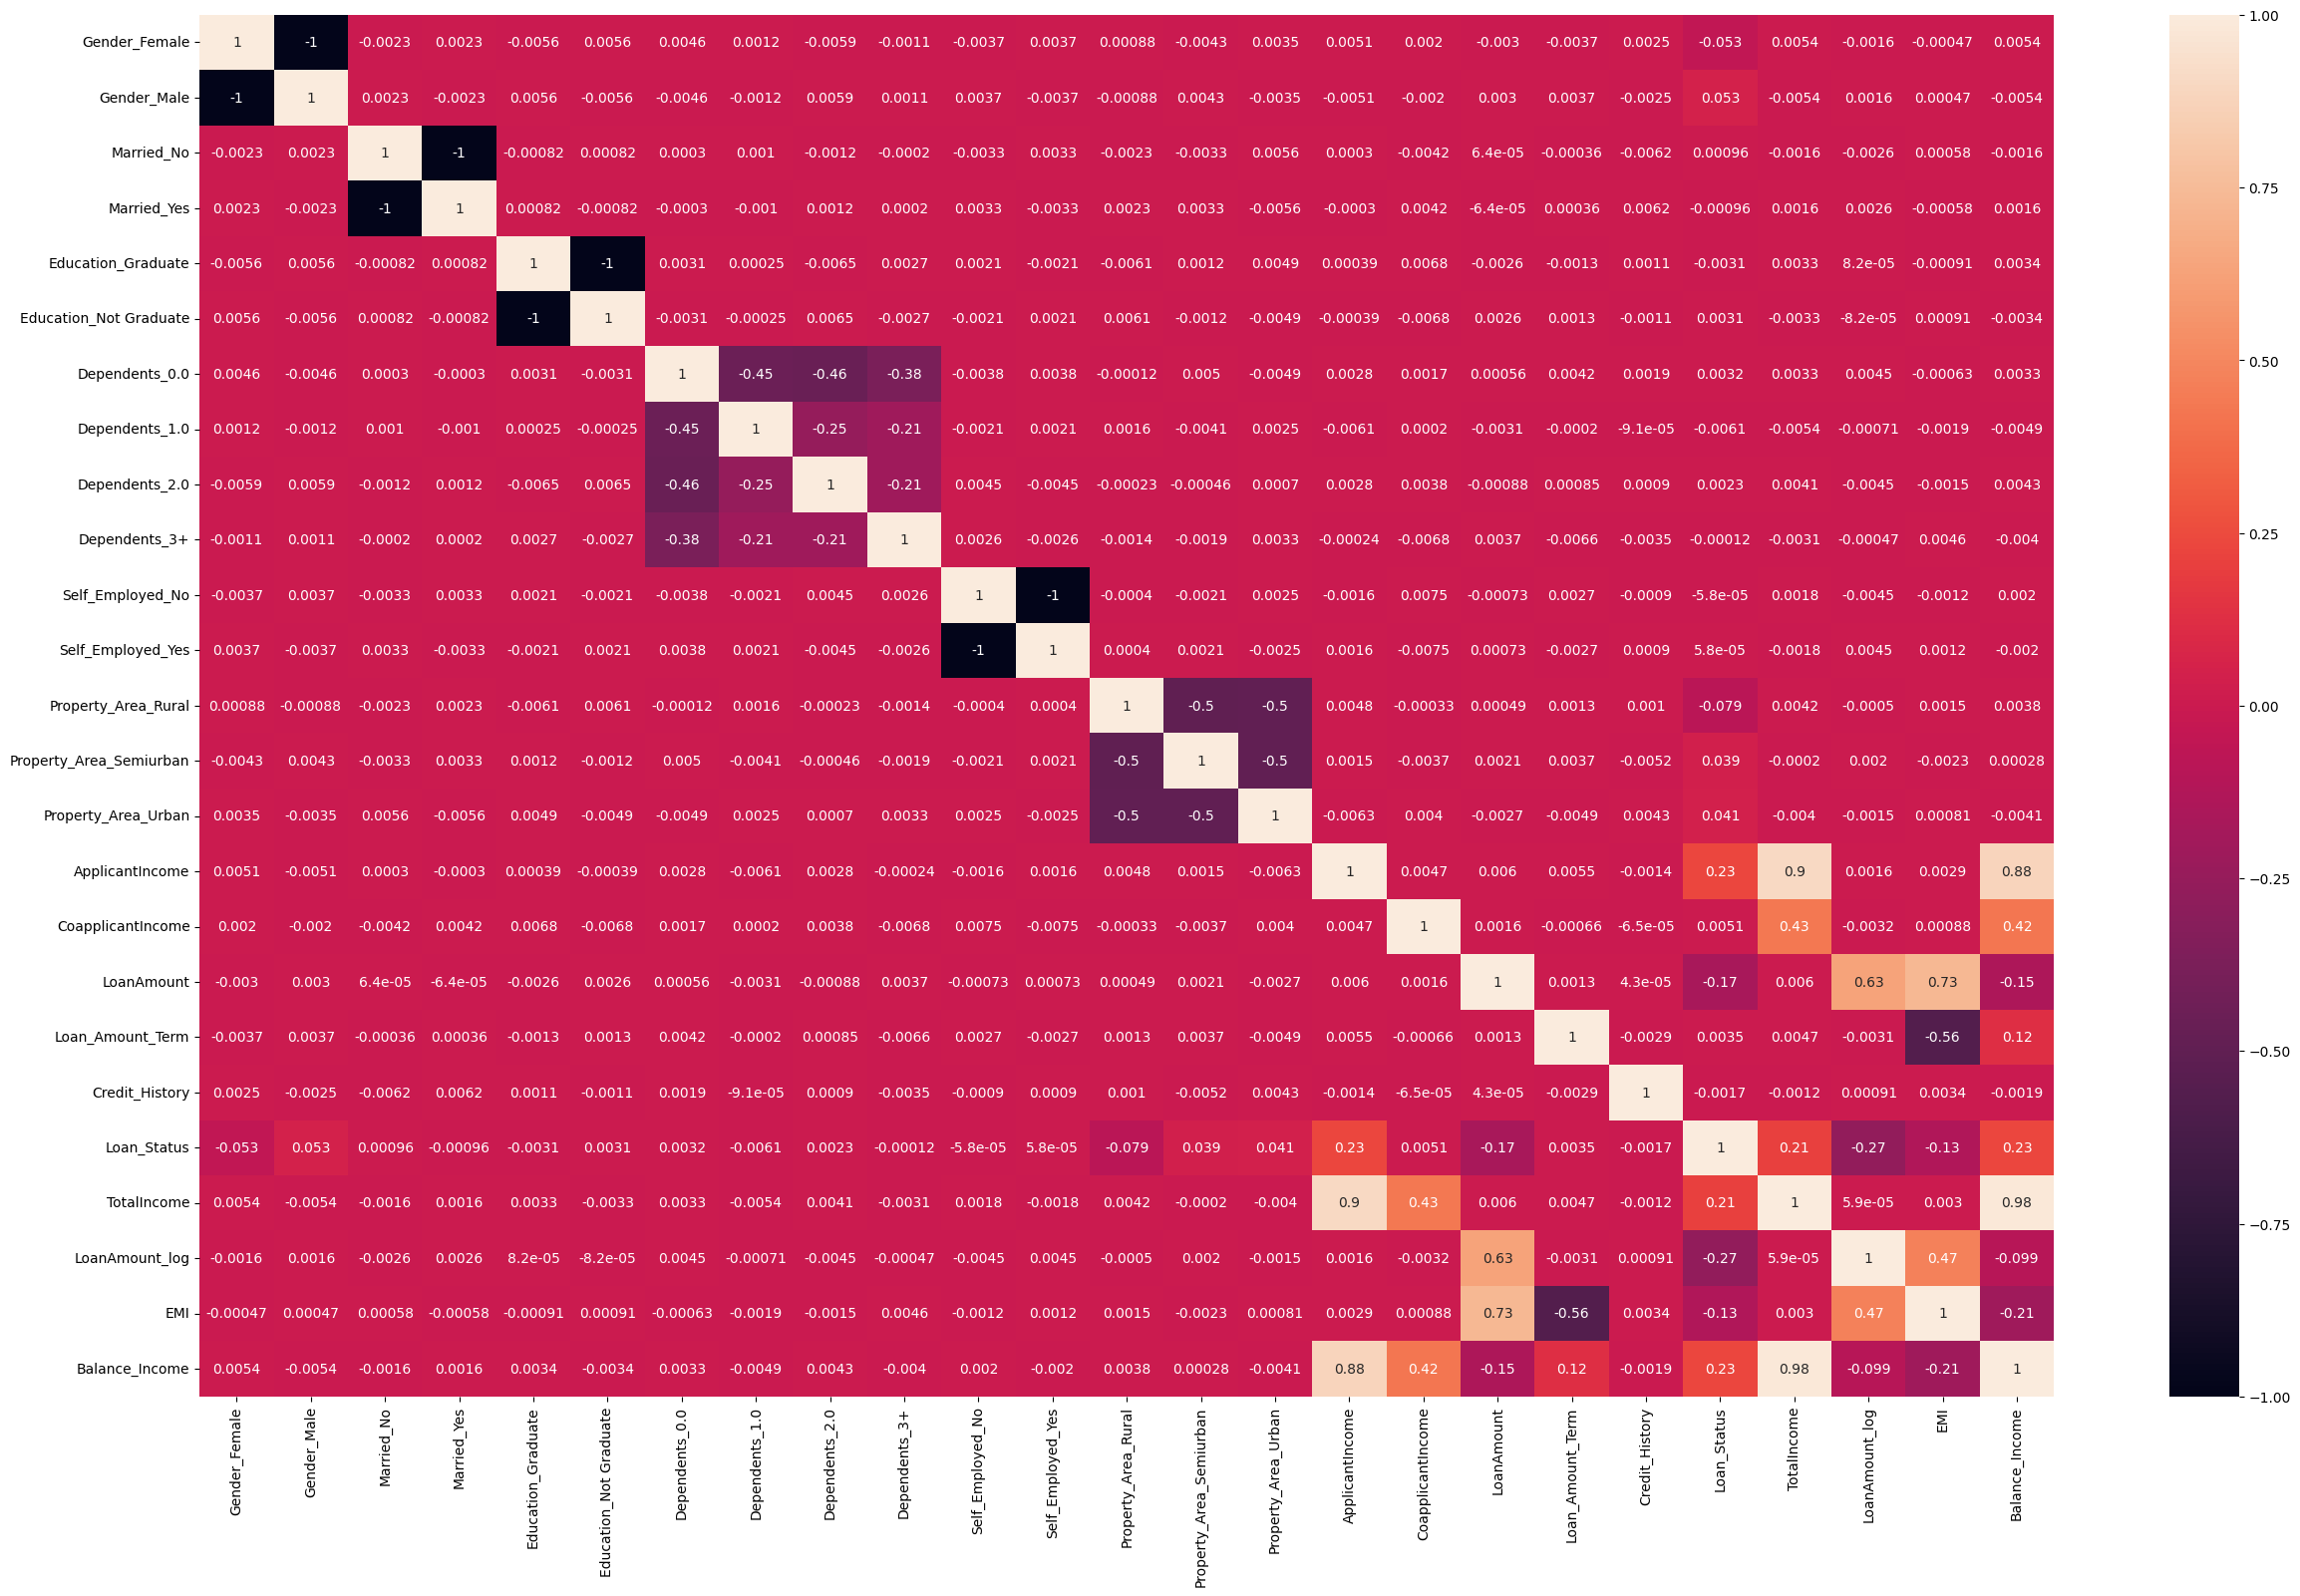

In [75]:
plt.figure(figsize=(30,18))
sns.heatmap(loan_data_encoded_.corr(),annot=True)

## Variance inflation Factor

In [76]:
!pip install statsmodels

Access is denied.


In [77]:
# Check NaNs
print(loan_data_encoded_.isnull().sum())  
# Check infs
print(np.isinf(loan_data_encoded_).sum())

Gender_Female              0
Gender_Male                0
Married_No                 0
Married_Yes                0
Education_Graduate         0
Education_Not Graduate     0
Dependents_0.0             0
Dependents_1.0             0
Dependents_2.0             0
Dependents_3+              0
Self_Employed_No           0
Self_Employed_Yes          0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Loan_Status                0
TotalIncome                0
LoanAmount_log             0
EMI                        0
Balance_Income             0
dtype: int64
Gender_Female              0
Gender_Male                0
Married_No                 0
Married_Yes                0
Education_Graduate         0
Education_Not Graduate     0
Dependents_0.0             0
Dependents_1.0             0
Dependents_2.0             0
D

In [78]:
print(loan_data_encoded_['LoanAmount_log'].isnull().sum())   # Check NaNs
print(np.isinf(loan_data_encoded_['LoanAmount_log']).sum())  # Check infs

0
0


In [79]:
# Create a DataFrame to store VIF results
import statsmodels.api as sm

def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = df.columns
    vif_data["VIF"] = [sm.OLS(df[col], df.drop(col, axis=1)).fit().rsquared for col in df.columns]
    return vif_data

vif_result = calculate_vif(loan_data_encoded_)
vif_result

,Variable,VIF
0,Gender_Female,1.000000
1,Gender_Male,1.000000
2,Married_No,1.000000
3,Married_Yes,0.999995
4,Education_Graduate,0.999999
5,Education_Not Graduate,1.000000
6,Dependents_0.0,1.000000
7,Dependents_1.0,1.000000
8,Dependents_2.0,1.000000
9,Dependents_3+,1.000000


All VIF are less than 5 hence we can say that there is no muticolinearity in data

In [80]:
loan_data_encoded_.shape

(99997, 25)

## Splitting data into independent and dependent features

In [81]:
# Step 1: Define X and y
X = loan_data_encoded_.drop(columns=['Loan_Status'])
y = loan_data_encoded_['Loan_Status']

In [82]:
# Step 2: Split into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [83]:
print(loan_data_encoded_.columns)

Index(['Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Education_Graduate', 'Education_Not Graduate', 'Dependents_0.0',
       'Dependents_1.0', 'Dependents_2.0', 'Dependents_3+', 'Self_Employed_No',
       'Self_Employed_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Loan_Status',
       'TotalIncome', 'LoanAmount_log', 'EMI', 'Balance_Income'],
      dtype='object')


In [84]:
loan_data_encoded_.dtypes

Gender_Female              float64
Gender_Male                float64
Married_No                 float64
Married_Yes                float64
Education_Graduate         float64
Education_Not Graduate     float64
Dependents_0.0             float64
Dependents_1.0             float64
Dependents_2.0             float64
Dependents_3+              float64
Self_Employed_No           float64
Self_Employed_Yes          float64
Property_Area_Rural        float64
Property_Area_Semiurban    float64
Property_Area_Urban        float64
ApplicantIncome            float64
CoapplicantIncome          float64
LoanAmount                   int64
Loan_Amount_Term           float64
Credit_History             float64
Loan_Status                  int64
TotalIncome                float64
LoanAmount_log             float64
EMI                        float64
Balance_Income             float64
dtype: object

In [85]:
print(loan_data_cleaned.columns)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'TotalIncome', 'LoanAmount_log', 'EMI', 'Balance_Income'],
      dtype='object')


In [86]:
num_cols = X.select_dtypes(include=['int64', 'float64']).columns

In [87]:
#Scale numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [88]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5],
    'class_weight': ['balanced']
}

In [89]:
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='f1')
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)

Best parameters: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 300}


## Random Forest

In [90]:
model = RandomForestClassifier(
    class_weight='balanced',
    max_depth=10,
    min_samples_split=2,
    n_estimators=300,
    random_state=42
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [91]:
print(X.shape, y.shape)
print(y.value_counts())

(99997, 24) (99997,)
Loan_Status
1    50030
0    49967
Name: count, dtype: int64


In [92]:
print("Train class distribution:")
print(y_train.value_counts())

Train class distribution:
Loan_Status
1    40024
0    39973
Name: count, dtype: int64


In [93]:
#Evaluation
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.56      0.71      9994
           1       0.69      0.99      0.81     10006

    accuracy                           0.77     20000
   macro avg       0.83      0.77      0.76     20000
weighted avg       0.83      0.77      0.76     20000

Confusion Matrix:
 [[5560 4434]
 [ 127 9879]]
ROC AUC Score: 0.7760580593809013


## Cross Validation

In [94]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score

In [95]:
scorer = make_scorer(f1_score)

In [96]:
scores = cross_val_score(model, X, y, cv=5, scoring=scorer)

In [97]:
print("F1 scores in each fold:", scores)
print("Average F1 score:", np.mean(scores))

F1 scores in each fold: [0.81357187 0.81374367 0.81355234 0.81228445 0.81359287]
Average F1 score: 0.8133490401021863


In [98]:
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
print("\nTop Features:\n", feature_importances.sort_values(ascending=False).head(10))


Top Features:
 LoanAmount_log         0.205885
LoanAmount             0.201493
ApplicantIncome        0.190548
TotalIncome            0.089974
EMI                    0.089027
Balance_Income         0.069515
Property_Area_Rural    0.045399
CoapplicantIncome      0.025947
Gender_Female          0.021293
Gender_Male            0.017769
dtype: float64


## Conclusions

In [ ]:
#
The Random Forest classifier achieved an average F1-score of ~0.796 across 5-fold cross-validation, indicating a strong balance between precision and recall despite class imbalance. While initial accuracy was around 67%, the cross-validated F1 score highlighted robust generalization.

In [ ]:
##### CoapplicantIncome & ApplicantIncome	Strongly influence loan approval	
#Higher incomes generally indicate better repayment ability. These features were the top two in importance scores.

In [ ]:
##### EMI (Equated Monthly Installment) and Balance Income significantly impacted approval: 
#Lower EMI and higher disposable income post EMI payment indicated better approval chances.

In [ ]:
##### Features like Self_Employed and Dependents had less predictive powe:
#It suggest that employment type or number of dependents did not strongly influence the outcome. how do we see these two points

## Other additional models

## Logistic 

In [99]:
from sklearn.linear_model import LogisticRegression

In [100]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],              # Regularization strength (inverse)
    'penalty': ['l1', 'l2'],                   # Type of regularization
    'solver': ['liblinear'],                   # Solver compatible with l1/l2
    'class_weight': ['balanced', None]         # Handle imbalance if needed
}

In [101]:
# Initialize logistic regression with class_weight to handle imbalance
log_reg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [102]:
grid = GridSearchCV(log_reg, param_grid, cv=5, scoring='roc_auc')
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000, random_state=42),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='roc_auc')

In [103]:
print("Best parameters:", grid.best_params_)
print("Best ROC AUC score:", grid.best_score_)

Best parameters: {'C': 0.01, 'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear'}
Best ROC AUC score: 0.7384500456377256


In [104]:
best_logreg = grid.best_estimator_
y_pred = best_logreg.predict(X_test)

In [105]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, best_logreg.predict_proba(X_test)[:, 1]))

[[6940 3054]
 [3499 6507]]
              precision    recall  f1-score   support

           0       0.66      0.69      0.68      9994
           1       0.68      0.65      0.67     10006

    accuracy                           0.67     20000
   macro avg       0.67      0.67      0.67     20000
weighted avg       0.67      0.67      0.67     20000

ROC AUC: 0.7347897645243152


In [106]:
scores = cross_val_score(best_logreg, X, y, cv=5, scoring=scorer)

print("F1 scores in each fold:", scores)
print("Average F1 score:", np.mean(scores))

F1 scores in each fold: [0.67211471 0.68019391 0.67386392 0.67546755 0.68398701]
Average F1 score: 0.677125420123991


## XGBoost

In [107]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [108]:
import xgboost as xgb

In [109]:
xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]),  # imbalance handling
    random_state=42
)

In [110]:
# Fit the model
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [111]:
# Predict
y_pred = xgb_clf.predict(X_test)
y_prob = xgb_clf.predict_proba(X_test)[:, 1]

In [112]:
# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC AUC Score:", roc_auc_score(y_test, y_prob))

Confusion Matrix:
 [[5633 4361]
 [ 276 9730]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.56      0.71      9994
           1       0.69      0.97      0.81     10006

    accuracy                           0.77     20000
   macro avg       0.82      0.77      0.76     20000
weighted avg       0.82      0.77      0.76     20000


ROC AUC Score: 0.7805795210086275


In [113]:
scores = cross_val_score(xgb_clf, X, y, cv=5, scoring=scorer)

print("F1 scores in each fold:", scores)
print("Average F1 score:", np.mean(scores))

F1 scores in each fold: [0.81097688 0.8104006  0.8072249  0.80858809 0.80952183]
Average F1 score: 0.8093424597761748


## Thank You